# Vegetable Prices for the year 2023 

In [1]:
from IPython.display import display, HTML, Image

# Display the image in the center of the notebook
display(HTML('<center><img src=https://rosch-law.com/wp-content/uploads/2017/05/apples-1841132_1280-1024x682.jpg width="500" height="500"></center>'))


### Table of Content

#### [1. Project Overview](#1.Project_Overview)
- [1.1 Introduction](#1.1_Introduction)
- [1.2 Problem Statement](#1.2_Problem_Statement)
- [1.3 Objectives](#1.3_Objectives)
####  [2. Importing Packages](#2.Import_Packages)
#### [3. Loading Data](#3.Loading_data)
#### [4. Data Cleaning](#4.Data_Cleaning)
#### [5. Exploratory Data Analysis (EDA)](#5.Exploratory_Data_Analysis_(EDA))
#### [6. Conclusion](#6.Conclusion)

### 1.Project_Overview


#### 1.1_Introduction

This dataset captures the price fluctuations of various vegetables over the year 2023,offering insights into market trends,seasonal impacts and overall price volatility.The data encompasses details like the vegetable name,unit price.By analyzing this dataset,we can uncover patterns in vegetable pricing, evaluate the influence of external factors like weather or economic conditions, and predict future price trajectories.

#### 1.2_Problem_Statement


Vegetable prices fluctuate significantly making it difficult for farmers,retailers and consumers to plan and make informed decisions.Factors such as seasonality,Logistics and changing demand patterns contribute to price volatility.

#### 1.3_Objectives

- Determine which months have the highest and lowest prices for each vegetable.This could help retailers and consumers plan ahead by purchasing or storing vegetables when prices are lower.
- Calculate the average price for each vegetable to establish a baseline for cost expectations.
- Examine the correlation between vegetable prices to understand how changes in one commodity affect the prices of others.
  

### 2.Import_Packages

In [2]:
# Libraries for data loading, manipulation and analysis

import numpy as np
import pandas as pd
import csv
import seaborn as sns
import matplotlib.pyplot as plt

# Displays output inline
%matplotlib inline

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

### 3.Loading_data

In [3]:
import pandas as pd

df = pd.read_csv('prices.csv')

### 4.Data_Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Price Dates             287 non-null    object 
 1   Bhindi (Ladies finger)  287 non-null    float64
 2   Tomato                  287 non-null    int64  
 3   Onion                   287 non-null    float64
 4   Potato                  287 non-null    int64  
 5   Brinjal                 287 non-null    int64  
 6   Garlic                  287 non-null    int64  
 7   Peas                    287 non-null    int64  
 8   Methi                   287 non-null    int64  
 9   Green Chilli            287 non-null    float64
 10  Elephant Yam (Suran)    287 non-null    int64  
dtypes: float64(3), int64(7), object(1)
memory usage: 24.8+ KB


In [5]:
df.describe()

,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,29.444251,16.006969,20.649826,18.585366,31.655052,133.101045,66.658537,20.383275,44.122404,28.797909
std,8.124815,0.118056,11.711204,2.726238,11.725421,60.078331,33.302415,117.428417,12.796590,6.607973
min,17.000000,16.000000,8.000000,12.000000,14.000000,50.000000,22.000000,5.000000,0.130000,12.000000
25%,22.000000,16.000000,12.000000,16.000000,25.000000,85.000000,40.000000,8.000000,35.000000,25.000000
50%,27.500000,16.000000,16.000000,20.000000,30.000000,120.000000,60.000000,12.000000,40.000000,30.000000
75%,33.000000,16.000000,25.000000,20.000000,35.000000,165.000000,80.000000,16.000000,50.000000,30.000000
max,60.000000,18.000000,57.000000,24.000000,80.000000,290.000000,150.000000,2000.000000,90.000000,50.000000


In [6]:
df.head()

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6,35.0,25


### 4.1 Check and handling missing values

##### rows with missing values

In [7]:
# check for missing values in each row

rows_missing_vals = df.isnull().any(axis=1) # creates a boolean Series (return True for rows with any missing values).
num_records_w_missing_vals = rows_missing_vals.sum()

print(f'Number of records with missing values: {num_records_w_missing_vals}')

Number of records with missing values: 0


##### columns with missing values

In [8]:
# Count number of missing values per column

missing_vals_col = df.isnull().sum() # calculates the total count of True values for each column

print(missing_vals_col)

Price Dates               0
Bhindi (Ladies finger)    0
Tomato                    0
Onion                     0
Potato                    0
Brinjal                   0
Garlic                    0
Peas                      0
Methi                     0
Green Chilli              0
Elephant Yam (Suran)      0
dtype: int64


##### check for duplicate dates

In [9]:
# Group by the 'Price Dates' column and count occurrences
duplicate_counts = df.groupby('Price Dates').size()

# Filter to get only dates that appear more than once
duplicates_more_than_once = duplicate_counts[duplicate_counts[duplicate_counts > 1]]

print(duplicates_more_than_once)

Series([], dtype: int64)


This dataset does not contain missing values or duplicate dates







Imputing unrealistic min & max with suitable values

In [10]:

def clean_unrealistic_values(df):
    # For 'Green Chilli', values greater than 10 are unrealistic
    df['Green Chilli'] = df['Green Chilli'].apply(lambda x: np.nan if x < 15 else x)

    # For 'Methi', values greater than 50 are unrealistic
    df['Methi'] = df['Methi'].apply(lambda x: np.nan if x > 50  else x)

    # Replace NaN values (unrealistic entries) with the median
    df['Green Chilli'].fillna(df['Green Chilli'].median(), inplace=True)
    df['Methi'].fillna(df['Methi'].median(), inplace=True)
    
    return df

# Clean the dataframe
df_cleaned = clean_unrealistic_values(df)

# assign clean dataframe as the main dataframa
df = df_cleaned
df

,Price Dates,Bhindi (Ladies finger),Tomato,Onion,Potato,Brinjal,Garlic,Peas,Methi,Green Chilli,Elephant Yam (Suran)
0,01-01-2023,35.0,18,22.0,20,30,50,25,8.0,45.0,25
1,02-01-2023,35.0,16,22.0,20,30,55,25,7.0,40.0,25
2,03-01-2023,35.0,16,21.0,20,30,55,25,7.0,40.0,25
3,04-01-2023,30.0,16,21.0,22,25,55,25,7.0,40.0,25
4,08-01-2023,35.0,16,20.0,21,25,55,22,6.0,35.0,25
...,...,...,...,...,...,...,...,...,...,...,...
282,27-12-2023,45.0,16,30.0,20,70,260,40,16.0,40.0,25
283,28-12-2023,45.0,16,30.0,20,70,260,30,20.0,45.0,25
284,29-12-2023,45.0,16,30.0,22,80,260,30,18.0,50.0,25
285,31-12-2023,45.0,16,26.0,20,60,250,40,16.0,50.0,40


### 5.Exploratory_Data_Analysis_(EDA)

 Examine correlation using a heat-map

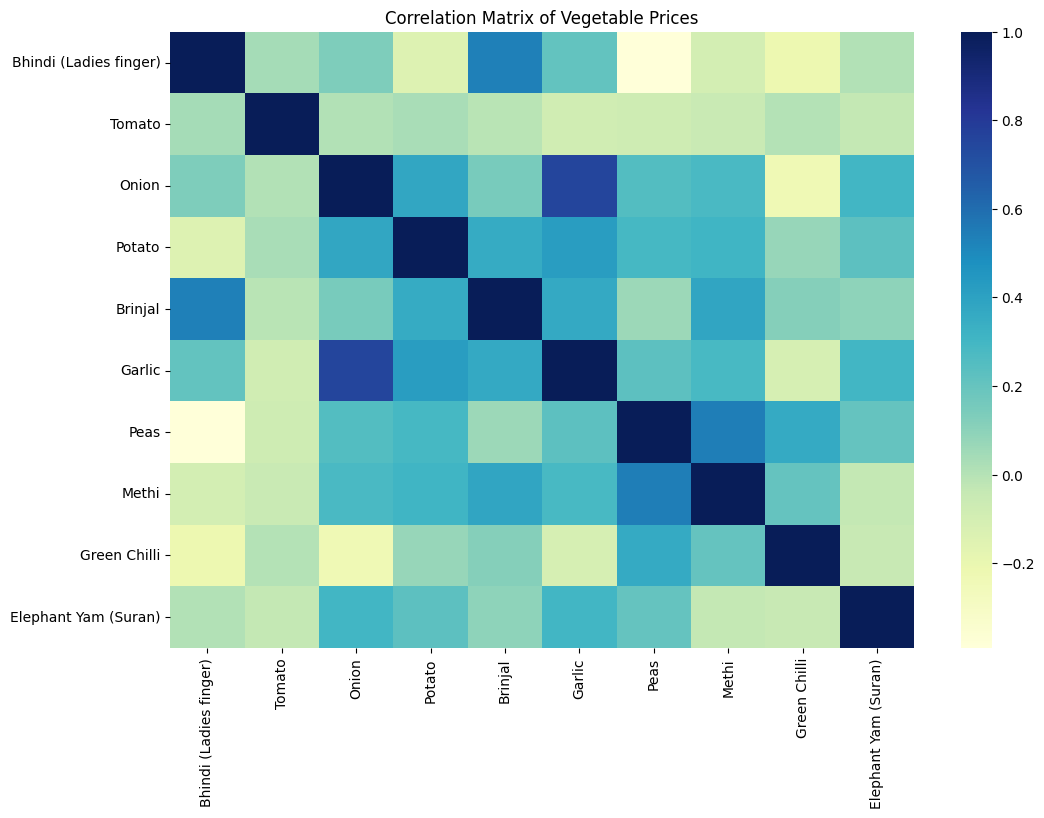

In [11]:
# Calculate the correlation matrix
correlation_matrix = df.corr(numeric_only=True)

# Create a heatmap using seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Matrix of Vegetable Prices')
plt.show()

**Result**:From the above heat map we can observe that there is a moderate correlation between onion and garlic,there is also a moderate correlation between brinjal and bhindi

__Create a box plot for the correlation of vegetable prices__

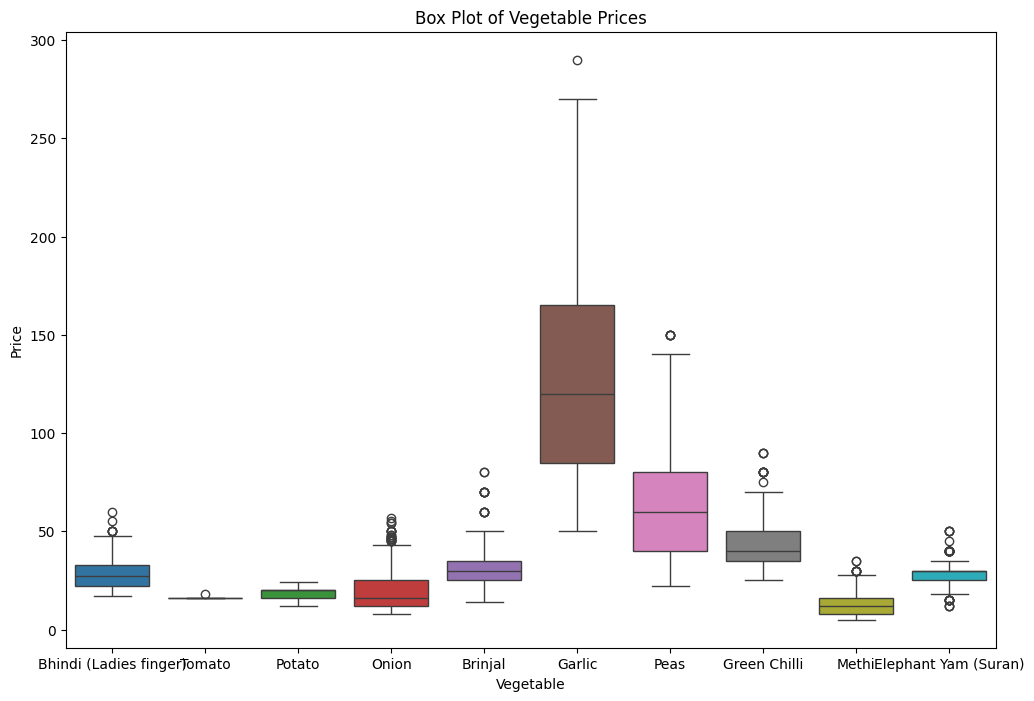

In [12]:
# Set Figure Size: 
plt.figure(figsize=(12,8))

# Box Plot with Seaborn
sns.boxplot(data=df[['Bhindi (Ladies finger)','Tomato', 'Potato', 'Onion','Brinjal','Garlic','Peas','Green Chilli', 'Methi','Elephant Yam (Suran)']])  # Replace with the columns you want to analyze

# Plot Titles and Labels:
plt.title('Box Plot of Vegetable Prices')
plt.ylabel('Price')
plt.xlabel('Vegetable')

plt.show()

**Result**: Prices vary significantly across different vegetables. Some vegetables like Garlic have a much wider price range compared to others, on the other hand The price range for Tomato is relatively narrow, suggesting more consistent pricing and The price range for Peas is moderate, with a slightly skewed distribution towards higher prices.

__Monthly Min vs Max values for each vegetable__

In [13]:
# convert Price dates column format to show day first
df['Price Dates'] = pd.to_datetime(df['Price Dates'], dayfirst=True) 

# create month column and assign with month names
df['Month'] = df['Price Dates'].dt.strftime('%B')

# average value for each month per vegetable
avg_monthly = df.groupby('Month').mean(numeric_only=True)

# Get the minimum values for each vegetable
min_values = avg_monthly.min(numeric_only=True)

# Get the maximum values for each vegtable
max_values = avg_monthly.max(numeric_only=True)

# Find min and max values and respective months
min_values = avg_monthly.min()
max_values = avg_monthly.max()
min_months = avg_monthly.idxmin()
max_months = avg_monthly.idxmax()

# Combine all information into a single DataFrame
min_max_info = pd.DataFrame({ 
    'Min Value': min_values,
    'Min Month': min_months,
    'Max Value': max_values,
    'Max Month': max_months
})

# converting the ablove df into a more suitable
# # Creating the DataFrame
data = {
    "Vegetable": ["Bhindi (Ladies finger)", "Tomato", "Onion", "Potato", "Brinjal", "Garlic", "Peas", "Methi", "Green Chilli", "Elephant Yam (Suran)"],
    "Min Value": [21.62, 16.0, 9.354167, 13.615385, 22.153846, 72.222222, 26.166667, 7.192308, 35.217391, 24.6],
    "Min Month": ["May", "April", "April", "March", "March", "January", "January", "March", "December", "May"],
    "Max Value": [45.913043, 16.111111, 44.73913, 20.388889, 52.173913, 267.826087, 123.846154, 26.615385, 73.0, 35.64],
    "Max Month": ["December", "January", "November", "January", "December", "December", "October", "October", "July", "August"]
}

min_max_info = pd.DataFrame(data)

# Display the DataFrame
min_max_info

,Vegetable,Min Value,Min Month,Max Value,Max Month
0,Bhindi (Ladies finger),21.620000,May,45.913043,December
1,Tomato,16.000000,April,16.111111,January
2,Onion,9.354167,April,44.739130,November
3,Potato,13.615385,March,20.388889,January
4,Brinjal,22.153846,March,52.173913,December
5,Garlic,72.222222,January,267.826087,December
6,Peas,26.166667,January,123.846154,October
7,Methi,7.192308,March,26.615385,October
8,Green Chilli,35.217391,December,73.000000,July
9,Elephant Yam (Suran),24.600000,May,35.640000,August


**Results**: Tomatoes can be grown year-round in various climates and are cultivated widely across different regions. Greenhouses and controlled environments also allow for continuous production, which helps smooth out supply fluctuations that might otherwise lead to price volatility.This is shown by the insignificant difference in the table above between the min and the max price for tomato 

**Calculate overall mean per vegetable to establish baseline cost expectation**


In [14]:
# mean values for vegetables
df_mean = df.mean(numeric_only=True)

# formatting table
means_df = df_mean.reset_index()

# renaming incorrectly named columns
means_df['vegetable'] = means_df['index']
means_df['mean'] = means_df[0]

# delete incorrectly named columns
means_df = means_df.drop('index', axis=1)
means_df = means_df.drop(0, axis=1)

means_df

,vegetable,mean
0,Bhindi (Ladies finger),29.444251
1,Tomato,16.006969
2,Onion,20.649826
3,Potato,18.585366
4,Brinjal,31.655052
5,Garlic,133.101045
6,Peas,66.658537
7,Methi,13.456446
8,Green Chilli,44.261324
9,Elephant Yam (Suran),28.797909


__Visual for min/max price per vegetable__


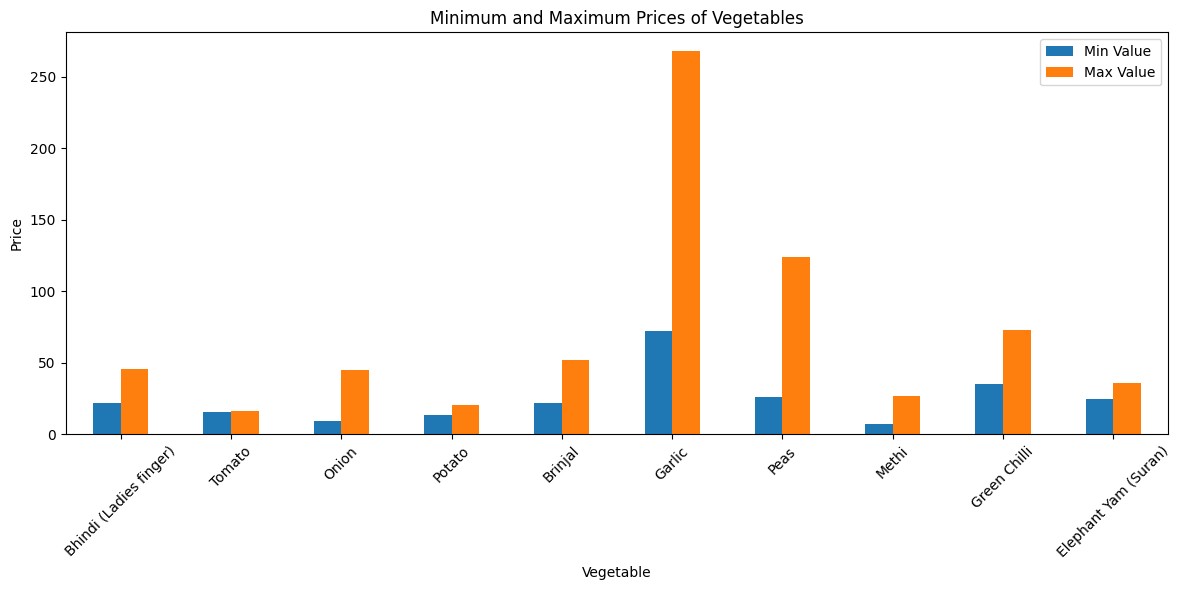

In [15]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(12, 6))

# Create the bar plot with grouped bars
min_max_info.plot(x='Vegetable', kind='bar', rot=45, ax=ax)

# Customize the plot
ax.set_xlabel('Vegetable')
ax.set_ylabel('Price')
ax.set_title('Minimum and Maximum Prices of Vegetables')

# Show the plot
plt.tight_layout()
plt.show()

**Results**: Garlic is widely recognized for its health benefits, especially for boosting immunity. During health crises, like flu seasons or pandemics, demand for garlic may surge, leading to higher prices as more consumers seek it out for its potential immune-supporting properties.

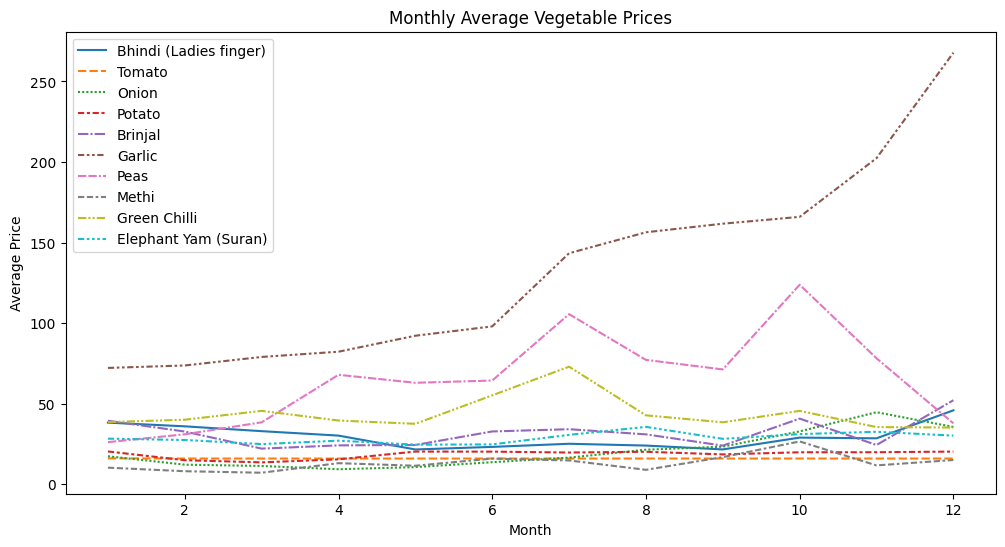

In [16]:
# Convert 'Price Dates' to Datetime:
df['Price Dates'] = df['Price Dates'].astype('datetime64[ns]')

# Extract the Month:
df['Price Dates'] = pd.to_datetime(df['Price Dates'])

# Calculate Monthly Averages:
df['Month'] = df['Price Dates'].dt.month
monthly_avg_prices = df.groupby('Month').mean()

# Plot the Monthly Average Prices:
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_avg_prices)
plt.title('Monthly Average Vegetable Prices')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()

**Results**: From the above line chart we can observe that Peas experiences significant price fluctuations, with some periods of high prices

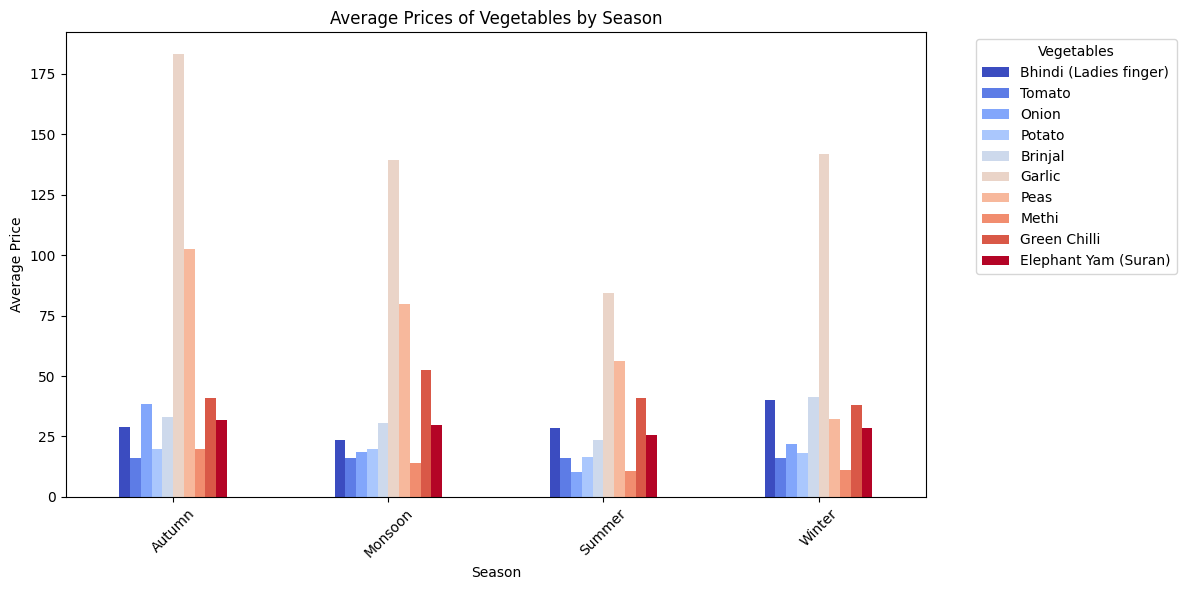

In [17]:
# create function to assign seasons to each month
def assign_season(month):
    """Assigns a season to a given month based on Indian meteorological seasons.

    Args:
        month (int): The month number (1-12).

    Returns:
        str: The corresponding season.
    """

    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Summer"
    elif month in [6, 7, 8, 9, 12]:
        return "Monsoon"
    else:
        return "Autumn"

# create season column and assign season
df['Season'] = df['Month'].apply(assign_season)

# group by season using mean of price of per vegetable 
group_seasons = df.groupby('Season').mean(numeric_only=True)

# change index to column
seasons_df = group_seasons.reset_index()

# drop month column
seasons_df.drop('Month', axis=1, inplace=True)

# # Set 'Season' as the index to plot each season's vegetable averages on the same graph
seasons_df.set_index('Season', inplace=True)

# Plot the data
seasons_df.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.title('Average Prices of Vegetables by Season')
plt.xlabel('Season')
plt.ylabel('Average Price')
plt.legend(title='Vegetables', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to ensure everything fits
plt.show()

**Results**:The above graph shows us how different vegetable prices fluctuate across different seasons, Onions are cheaper in summer because they are commonly planted in spring and harvested in summer.

### 6.Conclusion